In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
path_to_input = '/Users/y1u0d2/desktop/Lab/result/nnp-train/two-three-body/04/02'
with open(f'{path_to_input}/input.nn') as f:
    l_strip = [s.strip() for s in f.readlines()]
    l_strip = filter(lambda line: 'symfunction_short' in line and not line.startswith('#'), l_strip)

In [80]:
radial = [2]
angular = [3, 9]
rad_params = []
ang_params = []
for i in l_strip:
    sf_arr = list(filter(None, i.split(' ')))
    sf_type = int(sf_arr[2])
    if sf_type in radial:
        param = {
            'center': sf_arr[1],
            'neighbor': sf_arr[3],
            'eta': float(sf_arr[4]),
            'r_shift': float(sf_arr[5]),
            'r_cut': float(sf_arr[6])
        }
        rad_params.append(param)
    elif sf_type in angular:
        param = {
            'center': sf_arr[1],
            'neighbor1': sf_arr[3],
            'neighbor2': sf_arr[4],
            'eta': float(sf_arr[5]),
            'lambda': float(sf_arr[6]),
            'zeta': float(sf_arr[7]),
            'r_cut': float(sf_arr[8]),
            'r_shift': float(sf_arr[9])
        }
        ang_params.append(param)
    else:
        raise Exception('invalid sf_type')

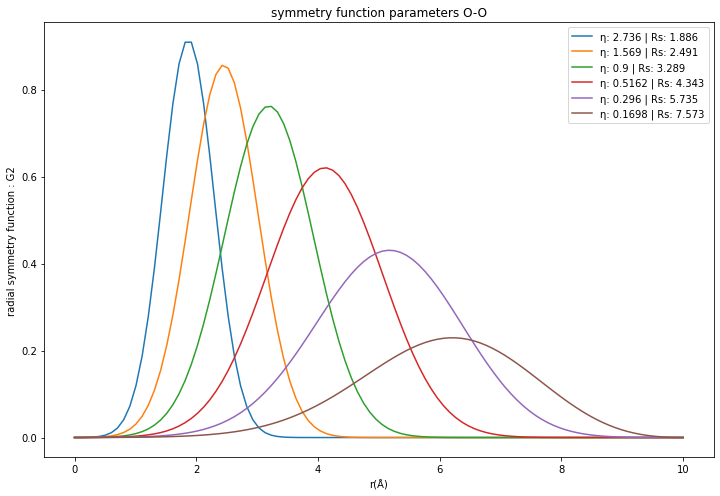

In [88]:
from descriptors.acsf.sf_function import SymmetryFunction
def plot_sf(params, ax, center='', neighbor=''):
    params = list(filter(lambda param: param['center'] == center and param['neighbor'] == neighbor, params))
    r_cut = max([param['r_cut'] for param in params])
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    ax.set_title(f'symmetry function parameters {center}-{neighbor}')
    ax.set_xlabel(f'r(Å)')
    ax.set_ylabel(f'radial symmetry function : G2')
    for param in list(params):
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param['eta'], r_ij=k, r_shift=param['r_shift'], r_cutoff=param['r_cut']) for k in
                 r_ij], label=f'η: {param["eta"]} | Rs: {param["r_shift"]}')
    ax.legend()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plot_sf(rad_params, ax=ax, center='O', neighbor='O')